# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key
weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

temp_units ="imperial"

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(len(cities))

592


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "metric"

#data frame llist 
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | merauke
Processing Record 3 of Set 1 | fort morgan
Processing Record 4 of Set 1 | lagoa
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | ajdabiya
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | narsaq
City not found. Skipping...
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | mabaruma
Processing Record 11 of Set 1 | hambantota
Processing Record 12 of Set 1 | ribeira grande
City not found. Skipping...
Processing Record 13 of Set 1 | koumac
Processing Record 14 of Set 1 | sao paulo de olivenca
Processing Record 15 of Set 1 | oktyabrskoye
Processing Record 16 of Set 1 | vaini
City not found. Skipping...
Processing Record 17 of Set 1 | mataura
City not found. Skipping...
Processing Record 18 of Set 1 | teseney
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | high prairie
Proce

Processing Record 39 of Set 4 | artyom
Processing Record 40 of Set 4 | cordoba
Processing Record 41 of Set 4 | sehore
Processing Record 42 of Set 4 | yakeshi
Processing Record 43 of Set 4 | vilhena
Processing Record 44 of Set 4 | wajima
Processing Record 45 of Set 4 | saint-joseph
City not found. Skipping...
Processing Record 46 of Set 4 | killybegs
Processing Record 47 of Set 4 | sistranda
Processing Record 48 of Set 4 | exmouth
Processing Record 49 of Set 4 | owando
Processing Record 1 of Set 5 | mustasaari
Processing Record 2 of Set 5 | roseburg
Processing Record 3 of Set 5 | roma
Processing Record 4 of Set 5 | biograd na moru
Processing Record 5 of Set 5 | gotsu
Processing Record 6 of Set 5 | victoria
Processing Record 7 of Set 5 | cape town
Processing Record 8 of Set 5 | nadym
Processing Record 9 of Set 5 | mattru
City not found. Skipping...
Processing Record 10 of Set 5 | vestmannaeyjar
Processing Record 11 of Set 5 | haines junction
Processing Record 12 of Set 5 | shiyan
Process

Processing Record 35 of Set 8 | lagos
City not found. Skipping...
Processing Record 36 of Set 8 | saint-michel-des-saints
Processing Record 37 of Set 8 | sambava
Processing Record 38 of Set 8 | zhanaozen
Processing Record 39 of Set 8 | kerugoya
Processing Record 40 of Set 8 | gamba
City not found. Skipping...
City not found. Skipping...
Processing Record 41 of Set 8 | vaitape
Processing Record 42 of Set 8 | suna
Processing Record 43 of Set 8 | doha
Processing Record 44 of Set 8 | acapulco
City not found. Skipping...
Processing Record 45 of Set 8 | brae
Processing Record 46 of Set 8 | sibiti
Processing Record 47 of Set 8 | mayskiy
Processing Record 48 of Set 8 | hobyo
Processing Record 49 of Set 8 | iqaluit
Processing Record 1 of Set 9 | porto nacional
Processing Record 2 of Set 9 | auray
Processing Record 3 of Set 9 | naze
Processing Record 4 of Set 9 | faya
Processing Record 5 of Set 9 | kysyl-syr
Processing Record 6 of Set 9 | diapaga
Processing Record 7 of Set 9 | labuan
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
weather_data = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

weather_dataframe = pd.DataFrame(weather_data)

In [16]:
weather_dataframe.head()
weather_dataframe.to_csv(output_data_file)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#  Get the indices of cities that have humidity over 100%.


In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

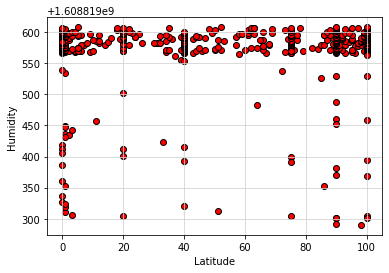

In [17]:
plt.scatter(weather_dataframe.iloc[:,1],weather_dataframe.iloc[:,3], edgecolors="black",facecolors="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Lat_temp.png")
plt.show()

## Latitude vs. Humidity Plot

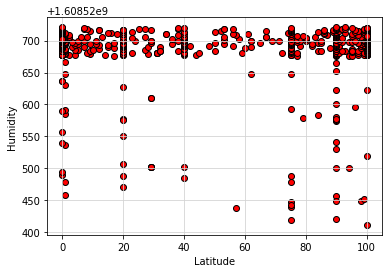

In [36]:
plt.scatter(weather_dataframe.iloc[:,1],weather_dataframe.iloc[:,3], edgecolors="black",facecolors="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Lat_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

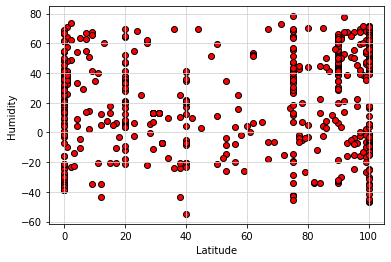

In [37]:
plt.scatter(weather_dataframe.iloc[:,1],weather_dataframe.iloc[:,5], edgecolors="black",facecolors="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Lat_cloudiness.png")
plt.show()

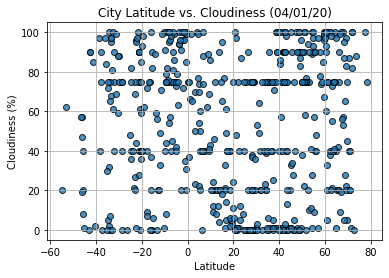

## Latitude vs. Wind Speed Plot

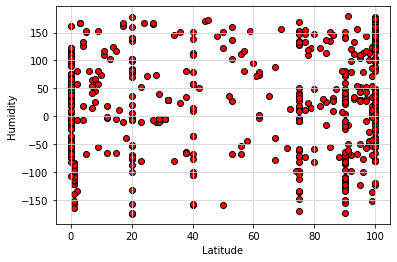

In [38]:
plt.scatter(weather_dataframe.iloc[:,1],weather_dataframe.iloc[:,6], edgecolors="black",facecolors="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Lat_Windspeed.png")
plt.show()

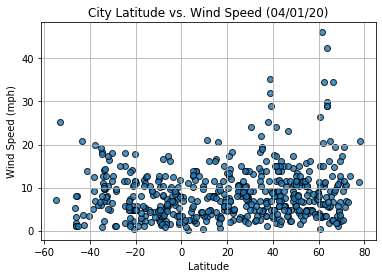

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

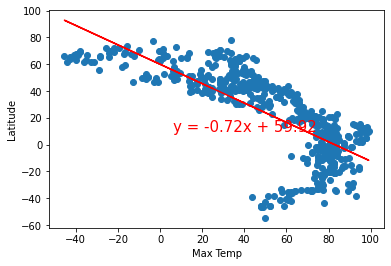

In [18]:
x_values = weather_dataframe['Max Temp']
y_values = weather_dataframe['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.show()

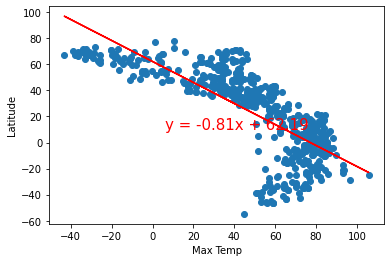

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

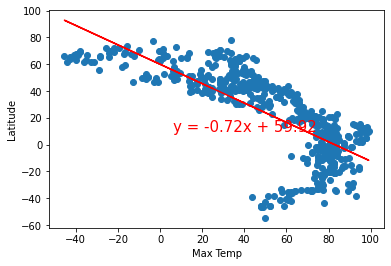

In [19]:
x_values = weather_dataframe['Max Temp']
y_values = weather_dataframe['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.show()

The r-value is: 0.6082708688906918


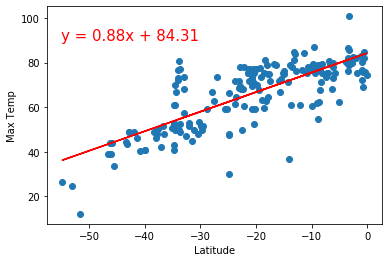

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

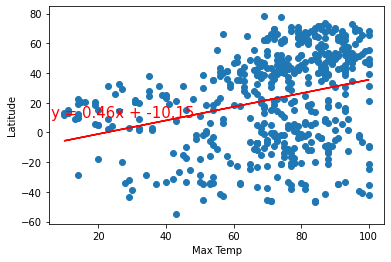

In [20]:
x_values = weather_dataframe['Humidity']
y_values = weather_dataframe['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.show()

The r-value is: 0.000543987878808455


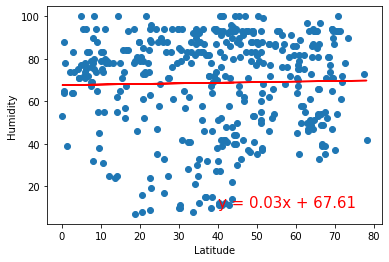

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


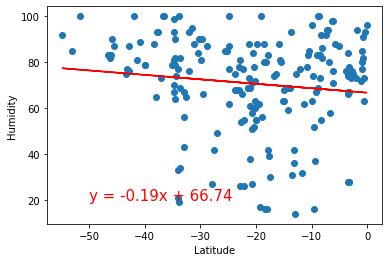

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

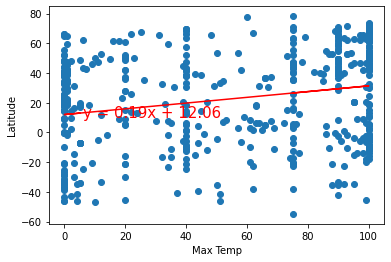

In [22]:
x_values = weather_dataframe['Cloudiness']
y_values = weather_dataframe['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.show()

The r-value is: 0.0020898727664228514


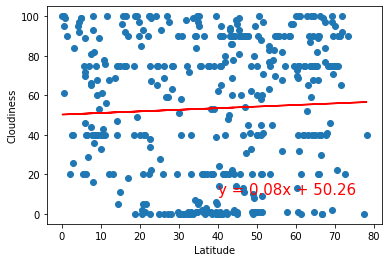

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


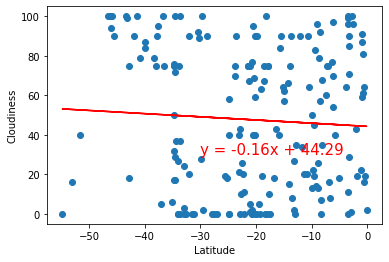

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

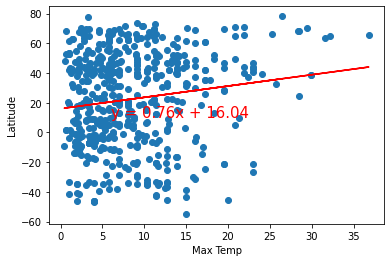

In [21]:
x_values = weather_dataframe['Wind Speed']
y_values = weather_dataframe['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.show()

The r-value is: 0.04019723576144484


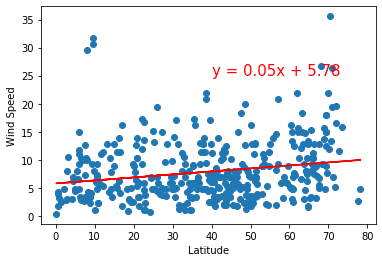

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


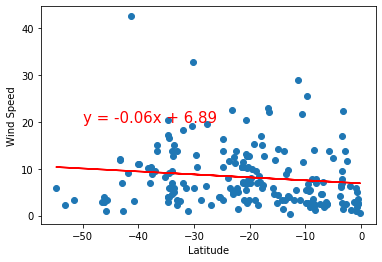